## Imports

In [47]:
import seaborn as sns
import plotly.express as px
import pandas as pd
import tensorflow.keras as keras
import numpy as np
import missingno as msno
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer

In diesem Notebook lernen Sie die zuvor erlernten Grundlagen des Supervised Learnings anhand des mpg Datasets anzuwenden. Hierfür wird sowohl eine Regression, als auch eine Klassifikation mithilfe von neuronalen Netzen durchgeführt. Da die Business & Data Understanding Schritte eigentlich vorgelagert wären wird hier noch einmal auf ein paar Tools/Packages und hilfreiche Methoden für die Herangehensweise an solche ML-Probleme gegeben.

## Daten laden

In [2]:
mpg = sns.load_dataset("mpg")

In [3]:
mpg ## Daten werden als pandas-Dataframe ausgeliefert

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

In [4]:
mpg.info() ##Pandas Dataframes kombinieren unterschiedliche Datentypen in einer Tabellenstruktur

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### loc und iloc zum indexieren und filtern

In [5]:
## loc --> immer bei nicht-numerischen Spaltenbezeichnungen oder boolschen Ausdrücken
mpg.loc[mpg.horsepower > 200, :]

##oder
mpg.loc[mpg.horsepower > 200, ['origin','mpg']]

origin   mpg
6      usa  14.0
7      usa  14.0
8      usa  14.0
13     usa  14.0
25     usa  10.0
27     usa  11.0
67     usa  11.0
94     usa  13.0
95     usa  12.0
116    usa  16.0

In [6]:
## iloc --> immer wenn nach numerischen Spalten gefiltert/indexiert werden soll
mpg.iloc[:5, :] #Ersten 5 Zeilen, Achtung:Letzter Index ist exklusiv!

mpg.iloc[:5,:-1] #Ersten 5 Zeilen und alle Spalten außer die letzte

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin  
0          70    usa  
1          70    usa  
2          70    usa  
3          70    usa  
4          70    usa

### Visuelle Übersicht durch Pairplot

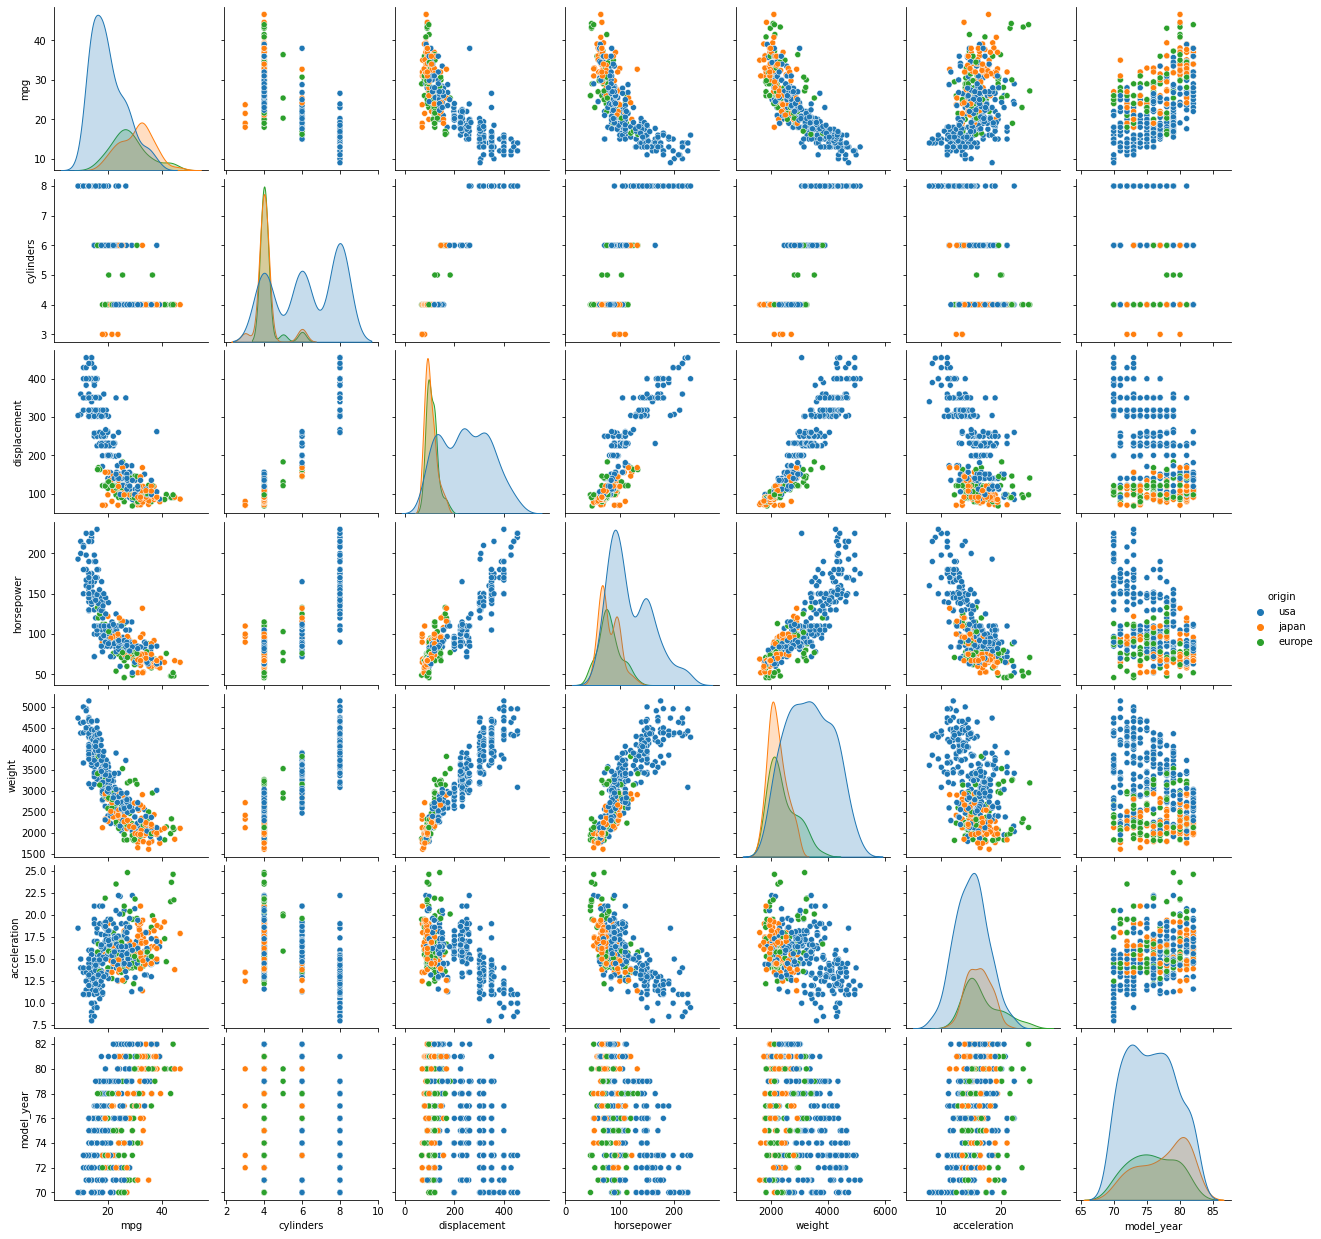

In [7]:
sns.pairplot(mpg.iloc[:,:-1], hue="origin")

### Fehlwertanalyse durch missingno

<AxesSubplot:>

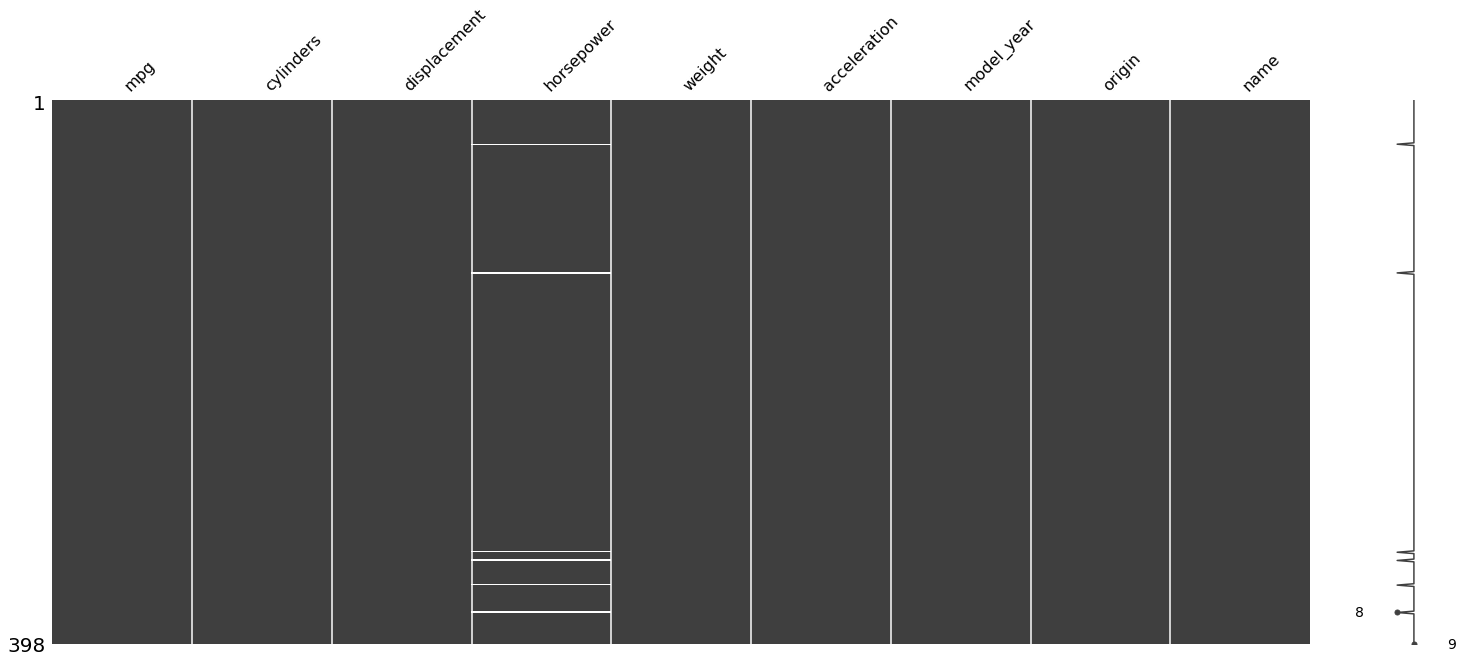

In [8]:
msno.matrix(mpg)

In [9]:
mpg.loc[mpg.horsepower.isna()] # Alle Fehlwerte ausgeben

mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl

### Fehlwerte imputieren

In [ ]:
## Methode A Deletion --> nicht empfohlen
## Methode B Imputation
## Methode C ML-Modell anhand vorhandener Features

In [10]:
px.box(mpg, x='horsepower', color='origin') # japan und europe ziemlich ähnlich aber usa deutlicher Unterschied --> Mittelwert keine gute Idee

In [ ]:
#Imputation mit dem Mittelwert ohne fillna-Methode
mpg.loc[mpg.horsepower.isna(),'horsepower'] = mpg.horsepower.mean()

In [11]:
#Imputation mit dem Mittelwert gruppiert nach der Klasse --> bessere Methode, da Autos je nach Origin unterschiedliche horsepower haben
mpg.horsepower = mpg.horsepower.fillna(mpg.groupby('origin')['horsepower'].transform('mean'))

<AxesSubplot:>

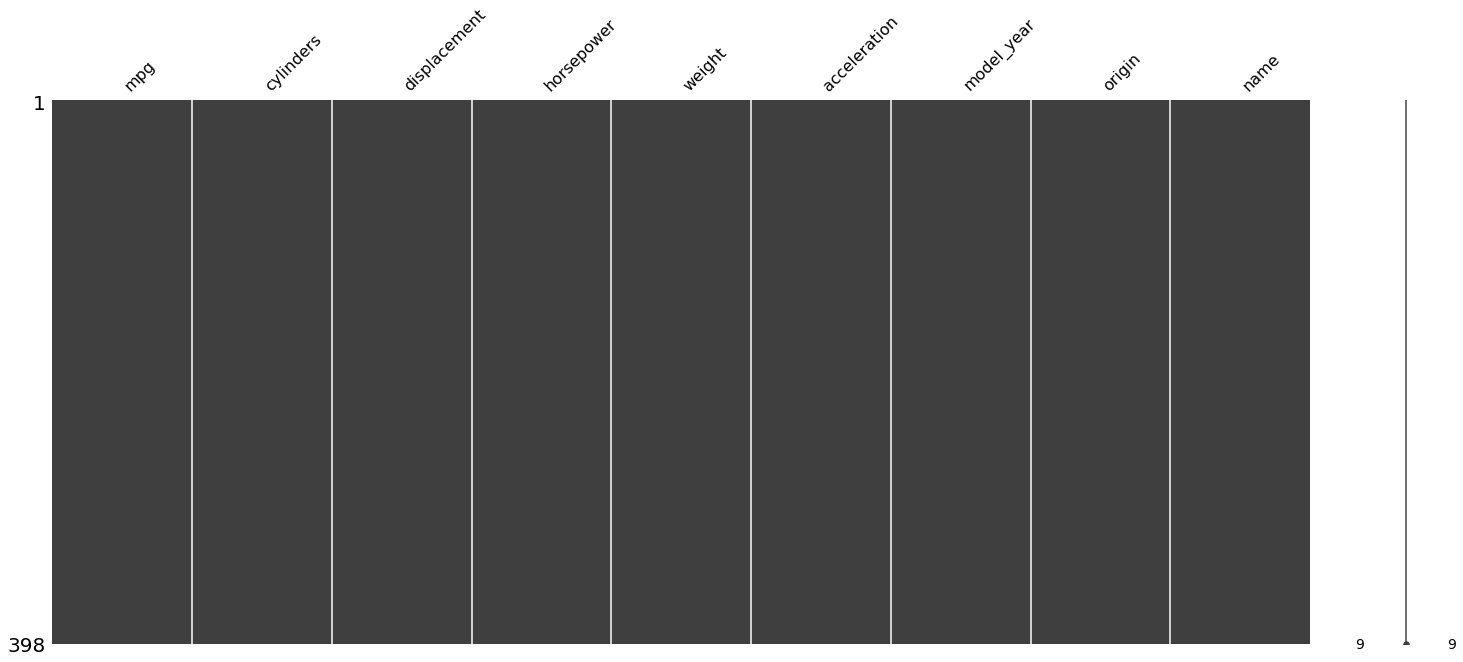

In [12]:
msno.matrix(mpg)

# Regression

Für dieses Regressionsmodell wollen wir die mpg(Miles per gallon) vorhersagen, welches ein Fahrzeug fahren kann.

In [13]:
##train-test split
from sklearn.model_selection import train_test_split

## Pre-Processing

In [14]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

In [15]:
mpg.origin = label_encoder.fit_transform(mpg.origin) ## Frage: Label Encoding vs. One-Hot Encoding

In [16]:
mpg.origin

0      2
1      2
2      2
3      2
4      2
      ..
393    2
394    0
395    2
396    2
397    2
Name: origin, Length: 398, dtype: int32

In [17]:
px.box(mpg, x='horsepower', color='origin') # japan und europe ziemlich ähnlich aber usa deutlicher Unterschied --> Mittelwert keine gute Idee

### Z-Transformation / StandardSkalierung

In [18]:
mpg.iloc[:,1:-3] = scaler.fit_transform(mpg.iloc[:,1:-3]) ## Mittelwert 0, Standardabweichung 1 (nicht immer genau möglich)

In [19]:
mpg

mpg  cylinders  displacement  horsepower    weight  acceleration  \
0    18.0   1.498191      1.090604    0.667358  0.630870     -1.295498   
1    15.0   1.498191      1.503514    1.583186  0.854333     -1.477038   
2    18.0   1.498191      1.196232    1.190688  0.550470     -1.658577   
3    16.0   1.498191      1.061796    1.190688  0.546923     -1.295498   
4    17.0   1.498191      1.042591    0.929023  0.565841     -1.840117   
..    ...        ...           ...         ...       ...           ...   
393  27.0  -0.856321     -0.513026   -0.483970 -0.213324      0.011586   
394  44.0  -0.856321     -0.925936   -1.373632 -0.993671      3.279296   
395  32.0  -0.856321     -0.561039   -0.536303 -0.798585     -1.440730   
396  28.0  -0.856321     -0.705077   -0.667136 -0.408411      1.100822   
397  31.0  -0.856321     -0.714680   -0.588636 -0.296088      1.391285   

     model_year  origin                       name  
0            70       2  chevrolet chevelle malibu  
1            70       2          buick skylark 320  
2            70       2         plymouth satellite  
3            70       2              amc rebel sst  
4            70       2                ford torino  
..          ...     ...                        ...  
393          82       2            ford mustang gl  
394          82       0                  vw pickup  
395          82       2              dodge rampage  
396          82       2                ford ranger  
397          82       2                 chevy s-10  

[398 rows x 9 columns]

In [20]:
### Was ist mit model_year?
mpg.model_year

0      70
1      70
2      70
3      70
4      70
       ..
393    82
394    82
395    82
396    82
397    82
Name: model_year, Length: 398, dtype: int64

In [21]:
mpg.model_year = mpg.model_year.astype("object")

In [22]:
prep_mpg = pd.get_dummies(mpg.iloc[:,:-1]) ## One-Hot Encodierung --> Problem? Man muss bei predict jetzt immer alle Spalten One-Hot codiert und StandardSkaliert angeben.

In [23]:
prep_mpg

mpg  cylinders  displacement  horsepower    weight  acceleration  \
0    18.0   1.498191      1.090604    0.667358  0.630870     -1.295498   
1    15.0   1.498191      1.503514    1.583186  0.854333     -1.477038   
2    18.0   1.498191      1.196232    1.190688  0.550470     -1.658577   
3    16.0   1.498191      1.061796    1.190688  0.546923     -1.295498   
4    17.0   1.498191      1.042591    0.929023  0.565841     -1.840117   
..    ...        ...           ...         ...       ...           ...   
393  27.0  -0.856321     -0.513026   -0.483970 -0.213324      0.011586   
394  44.0  -0.856321     -0.925936   -1.373632 -0.993671      3.279296   
395  32.0  -0.856321     -0.561039   -0.536303 -0.798585     -1.440730   
396  28.0  -0.856321     -0.705077   -0.667136 -0.408411      1.100822   
397  31.0  -0.856321     -0.714680   -0.588636 -0.296088      1.391285   

     origin  model_year_70  model_year_71  model_year_72  model_year_73  \
0         2              1              0              0              0   
1         2              1              0              0              0   
2         2              1              0              0              0   
3         2              1              0              0              0   
4         2              1              0              0              0   
..      ...            ...            ...            ...            ...   
393       2              0              0              0              0   
394       0              0              0              0              0   
395       2              0              0              0              0   
396       2              0              0              0              0   
397       2              0              0              0              0   

     model_year_74  model_year_75  model_year_76  model_year_77  \
0                0              0              0              0   
1                0              0              0              0   
2                0              0              0              0   
3                0              0              0              0   
4                0              0              0              0   
..             ...            ...            ...            ...   
393              0              0              0              0   
394              0              0              0              0   
395              0              0              0              0   
396              0              0              0              0   
397              0              0              0              0   

     model_year_78  model_year_79  model_year_80  model_year_81  model_year_82  
0                0              0              0              0              0  
1                0              0              0              0              0  
2                0              0              0              0              0  
3                0              0              0              0              0  
4                0              0              0              0              0  
..             ...            ...            ...            ...            ...  
393              0              0              0              0              1  
394              0              0              0              0              1  
395              0              0              0              0              1  
396              0              0              0              0              1  
397              0              0              0              0              1  

[398 rows x 20 columns]

In [24]:
X = prep_mpg.iloc[:,1:]
y = prep_mpg.iloc[:,0]

### Train-Test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Modelling

In [26]:
model = keras.models.Sequential() # einfachste Art von neuronalem Netz
model.add(keras.layers.Flatten(input_shape=[X_train.shape[1]])) # Konvertiert jedes Bild in ein 1D-Array
model.add(keras.layers.Dense(10, activation='relu')) # Hidden Layer with 10 Neurons, benutzt Relu als activation function
model.add(keras.layers.Dense(10, activation='relu')) # second dense hidden layer
model.add(keras.layers.Dense(1, activation='linear')) # 1 Output Neuronen für einen Ausgabewert

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[X_train.shape[1]]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1, activation='linear')
])

In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 19)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=5e-4), ##SGD = Stochastic Gradient Descent
    loss=keras.losses.MeanSquaredError(), ## Wird als Metrik für das Netzwerk verwendet um Error zu berechnen
    metrics=keras.losses.MeanAbsoluteError(), ## Nur für Monitoring, intern wird nichts mit diesem Wert gemacht
)

In [28]:
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=25, validation_split=0.2)

Epoch 1/25
8/8 [==============================] - 2s 267ms/step - loss: 580.8702 - mean_absolute_error: 22.8389 - val_loss: 471.4253 - val_mean_absolute_error: 20.3804
Epoch 2/25
8/8 [==============================] - 0s 5ms/step - loss: 534.0600 - mean_absolute_error: 21.7489 - val_loss: 354.0645 - val_mean_absolute_error: 17.4463
Epoch 3/25
8/8 [==============================] - 0s 7ms/step - loss: 376.1804 - mean_absolute_error: 17.9155 - val_loss: 150.5601 - val_mean_absolute_error: 10.3670
Epoch 4/25
8/8 [==============================] - 0s 6ms/step - loss: 142.0159 - mean_absolute_error: 9.9481 - val_loss: 62.6609 - val_mean_absolute_error: 6.3233
Epoch 5/25
8/8 [==============================] - 0s 7ms/step - loss: 68.0946 - mean_absolute_error: 6.6115 - val_loss: 56.2611 - val_mean_absolute_error: 6.0067
Epoch 6/25
8/8 [==============================] - 0s 9ms/step - loss: 56.7904 - mean_absolute_error: 6.1699 - val_loss: 51.7247 - val_mean_absolute_error: 5.7824
Epoch 7/25
8/

## Evaluierung

![title](../Bilder/MAE.png)

In [30]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 8ms/step - loss: 27.8470 - mean_absolute_error: 4.1618


[27.847009658813477, 4.161774635314941]

In [ ]:
## Durchschnittliche Abweichung von ca 4.16 --> Frage: Löst dies das Buisness Problem?

In [ ]:
## Übung Regression

# Klassifikation

Nachdem wir die Regression betrachtet haben gehen wir nun über zur Klassifikation. Im Gegensatz zur Klassifikation versuchen wir bei der Klassifikation kategorische Werte vorherzusagen, statts numerischen. Für dieses Beispiel nehmen wir dieses mal als target "origin".

In [87]:
mpg

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

    model_year  origin                       name  
0           70       2  chevrolet chevelle malibu  
1           70       2          buick skylark 320  
2           70       2         plymouth satellite  
3           70       2              amc rebel sst  
4           70       2                ford torino  
..         ...     ...                        ...  
393         82       2            ford mustang gl  
394         82       0                  vw pickup  
395         82       2              dodge rampage  
396         82       2                ford ranger  
397         82       2                 chevy s-10  

[398 rows x 9 columns]

## Pre-Processing --> grundsätzlich gleiches Vorgehen

In [88]:
mpg.horsepower = mpg.horsepower.fillna(mpg.groupby('origin')['horsepower'].transform('mean'))
label_encoder = LabelEncoder()
scaler = StandardScaler()
mpg.origin = label_encoder.fit_transform(mpg.origin) ## Frage: Label Encoding vs. One-Hot Encoding

In [89]:
mpg.iloc[:,:-3] = scaler.fit_transform(mpg.iloc[:,:-3]) ## Mittelwert 0, Standardabweichung 1 (nicht immer genau möglich)

In [90]:
mpg

mpg  cylinders  displacement  horsepower    weight  acceleration  \
0   -0.706439   1.498191      1.090604    0.667358  0.630870     -1.295498   
1   -1.090751   1.498191      1.503514    1.583186  0.854333     -1.477038   
2   -0.706439   1.498191      1.196232    1.190688  0.550470     -1.658577   
3   -0.962647   1.498191      1.061796    1.190688  0.546923     -1.295498   
4   -0.834543   1.498191      1.042591    0.929023  0.565841     -1.840117   
..        ...        ...           ...         ...       ...           ...   
393  0.446497  -0.856321     -0.513026   -0.483970 -0.213324      0.011586   
394  2.624265  -0.856321     -0.925936   -1.373632 -0.993671      3.279296   
395  1.087017  -0.856321     -0.561039   -0.536303 -0.798585     -1.440730   
396  0.574601  -0.856321     -0.705077   -0.667136 -0.408411      1.100822   
397  0.958913  -0.856321     -0.714680   -0.588636 -0.296088      1.391285   

    model_year  origin                       name  
0           70       2  chevrolet chevelle malibu  
1           70       2          buick skylark 320  
2           70       2         plymouth satellite  
3           70       2              amc rebel sst  
4           70       2                ford torino  
..         ...     ...                        ...  
393         82       2            ford mustang gl  
394         82       0                  vw pickup  
395         82       2              dodge rampage  
396         82       2                ford ranger  
397         82       2                 chevy s-10  

[398 rows x 9 columns]

In [104]:
mpg.model_year = mpg.model_year.astype("int")

In [105]:
mpg

mpg  cylinders  displacement  horsepower    weight  acceleration  \
0   -0.706439   1.498191      1.090604    0.667358  0.630870     -1.295498   
1   -1.090751   1.498191      1.503514    1.583186  0.854333     -1.477038   
2   -0.706439   1.498191      1.196232    1.190688  0.550470     -1.658577   
3   -0.962647   1.498191      1.061796    1.190688  0.546923     -1.295498   
4   -0.834543   1.498191      1.042591    0.929023  0.565841     -1.840117   
..        ...        ...           ...         ...       ...           ...   
393  0.446497  -0.856321     -0.513026   -0.483970 -0.213324      0.011586   
394  2.624265  -0.856321     -0.925936   -1.373632 -0.993671      3.279296   
395  1.087017  -0.856321     -0.561039   -0.536303 -0.798585     -1.440730   
396  0.574601  -0.856321     -0.705077   -0.667136 -0.408411      1.100822   
397  0.958913  -0.856321     -0.714680   -0.588636 -0.296088      1.391285   

     model_year  origin                       name  
0            70       2  chevrolet chevelle malibu  
1            70       2          buick skylark 320  
2            70       2         plymouth satellite  
3            70       2              amc rebel sst  
4            70       2                ford torino  
..          ...     ...                        ...  
393          82       2            ford mustang gl  
394          82       0                  vw pickup  
395          82       2              dodge rampage  
396          82       2                ford ranger  
397          82       2                 chevy s-10  

[398 rows x 9 columns]

In [106]:
X = mpg.iloc[:,:-2]
y = mpg.origin

In [107]:
y

0      2
1      2
2      2
3      2
4      2
      ..
393    2
394    0
395    2
396    2
397    2
Name: origin, Length: 398, dtype: int64

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Modelling

In [114]:
model = keras.models.Sequential() # einfachste Art von neuronalem Netz
model.add(keras.layers.Flatten(input_shape=[X.shape[1]])) # Konvertiert jedes Bild in ein 1D-Array
model.add(keras.layers.Dense(100, activation='relu')) # Hidden Layer with 300 Neurons, benutzt Relu als activation function
model.add(keras.layers.Dense(100, activation='relu')) # second dense hidden layer
model.add(keras.layers.Dense(3, activation='softmax')) # 10 Output Neuronen --> 1 für jede Klasse, softmax activation da Klassen exklusiv sind

In [99]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[X.shape[1]]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(3, activation='softmax')
])

In [110]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 7)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                80        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 33        
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd",metrics=["accuracy"]) #learning rate by default = 0.01

In [117]:
history = model.fit(X_train,y_train, batch_size=32, epochs=30, validation_split = 0.2)

Epoch 1/30
8/8 [==============================] - 0s 13ms/step - loss: 0.8429 - accuracy: 0.5512 - val_loss: 0.7662 - val_accuracy: 0.6719
Epoch 2/30
8/8 [==============================] - 0s 7ms/step - loss: 0.8927 - accuracy: 0.5709 - val_loss: 0.7788 - val_accuracy: 0.6719
Epoch 3/30
8/8 [==============================] - 0s 6ms/step - loss: 0.8239 - accuracy: 0.5669 - val_loss: 0.7247 - val_accuracy: 0.6719
Epoch 4/30
8/8 [==============================] - 0s 8ms/step - loss: 0.8077 - accuracy: 0.6220 - val_loss: 0.8884 - val_accuracy: 0.6719
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.8433 - accuracy: 0.75 - 0s 7ms/step - loss: 0.7680 - accuracy: 0.6378 - val_loss: 0.9790 - val_accuracy: 0.5469
Epoch 6/30
8/8 [==============================] - 0s 6ms/step - loss: 0.8851 - accuracy: 0.5630 - val_loss: 0.7984 - val_accuracy: 0.6719
Epoch 7/30
8/8 [==============================] - 0s 6ms/step - loss: 0.7691 - accuracy: 0.6457 - val_loss: 0.7733 - val_accuracy

In [118]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 0s/step - loss: 0.7976 - accuracy: 0.6000


[0.7976157069206238, 0.6000000238418579]

In [129]:
X.shape[1]

7

In [130]:
X_test.iloc[0,:].shape

(7,)

In [137]:
pd.DataFrame(X_test.iloc[0,:])

11
mpg           -1.218855
cylinders      1.498191
displacement   1.407489
horsepower     1.452354
weight         0.755016
acceleration  -2.747814
model_year    70.000000

### Standardskalierung umkehren

In [152]:
scaler.inverse_transform([-0.706439,1.498191,1.090604,0.667358,0.630870,-1.295498]) ## Wichtig! Modell muss das Gleiche sein

array([  17.99999766,    7.99999956,  307.00003145,  130.00001858,
       3504.00010643,   12.00000095])

In [150]:
model.predict(np.array([-0.706439,1.498191,1.090604,0.667358,0.630870,-1.295498,70.000000]).reshape(-1,7))

array([[0.10174758, 0.08024699, 0.81800544]], dtype=float32)

In [141]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 7)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               800       
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 303       
Total params: 11,203
Trainable params: 11,203
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Warum schlechte Accuracy? 
# Unzureichende Trainingsdaten
# Explorative Datenanalyse fehlt
# Informative Features?
# Irrelevante Features entfernen

In [ ]:
# Klassifizierung Übung